In [3]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./data/user_survey/2020RMWUserSurveyREDACTED.csv")
long_cols = df.columns
# Google survey column names are long, convert them to something easy to handle.
short_names = ["ts","ros2_version","application_type","transport_layer","domain","networking_skill","ros_years","familiarity",
               "debugging","changed","primary_vendor","out_of_box","understanding","change_ease","change_considered","selection",
               "support","documentation","tooling","features","performance","considered_change","better_for_ros","advocate_default","NPS","interop",
               "ros2_nps","use_dds","robust","secure","topolgy","journey","improved","advocate","extra"]
to_convert = ["out_of_box","understanding","change_ease","change_considered","selection",
               "support","documentation","tooling","features","performance","considered_change","better_for_ros","advocate_default","NPS","interop",
               "ros2_nps","use_dds","robust","secure"]
user_desc = ["networking_skill","ros_years","familiarity","debugging","changed"]

df.columns = short_names
df.head()
long_questions = long_cols[11:-5]

In [5]:
set(df["primary_vendor"].tolist())

{'ADLink CycloneDDS',
 'Gurum DDS',
 'OpenDDS',
 'RTI Connext',
 'eProsima FastDDS (Foxy default)'}

In [6]:
def agree_score(score):
    """
    Map strongly agree / disagree to a value from 1 to 5
    """
    values = {'Agree':5,
             'Disagree':1,
             'NO OPINION / NOT APPLICABLE':np.nan,
             'Neutral':3,
             'Strongly Agree':4,
             'Strongly Disagree':2,
             }
    return values[score]

# Convert words to values
for todo in to_convert:
    df[todo].apply(agree_score)

# Create two bins for fast and cyclone
cyclone = df[df["primary_vendor"]=='ADLink CycloneDDS']
fast = df[df["primary_vendor"]=='eProsima FastDDS (Foxy default)']

print("{0} Cyclone and {1} Fast responses".format(len(cyclone),len(fast)))
df.head()

30 Cyclone and 59 Fast responses


,ts,ros2_version,application_type,transport_layer,domain,networking_skill,ros_years,familiarity,debugging,changed,...,interop,ros2_nps,use_dds,robust,secure,topolgy,journey,improved,advocate,extra
0,2020/09/17 6:23:18 PM MDT,Foxy,Multiple robots controlled from multiple compu...,Inter process communication / all on a single ...,Medical,8,12.0,5,6,Yes,...,Neutral,Neutral,Agree,Agree,Agree,The system is a combined robot fleet manager a...,"We have been using Fast RTPS for two years, an...",A tool that makes it easy for a user to benchm...,NaN,NaN
1,2020/09/17 7:05:58 PM MDT,Foxy,Multiple robots controlled from multiple compu...,Inter process communication / all on a single ...,Corporate R&D,6,6.0,4,4,Yes,...,NO OPINION / NOT APPLICABLE,Strongly Agree,NO OPINION / NOT APPLICABLE,Agree,NO OPINION / NOT APPLICABLE,Individual robot agents in a common space. The...,I see frequent crashes of Rviz in use and swit...,"Better Wifi support, focus on no errors / warn...",NaN,"In the document for RMW selection, I would con..."
2,2020/09/17 8:07:13 PM MDT,Foxy,One robot controlled from with second remote c...,Inter process communication / all on a single ...,Education,8,1.0,4,5,Yes,...,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Used in education domain and controlled by WiFi.,Cyclone DDS has better performance and less pr...,Some debug tools is not as sufficient as ROS1.,Of cource rmw_cyclonedds_cpp.,None.
3,2020/09/17 8:07:24 PM MDT,Foxy,One robot controlled from with second remote c...,A wireless network (802.11 a/b/g) that you con...,Academic Research,8,2.0,3,5,Yes,...,Neutral,Agree,Neutral,Agree,Agree,I can setup a WiFi router by myself to share t...,I have bad experience in node discovery when u...,NaN,NaN,NaN
4,2020/09/18 12:20:08 AM MDT,Foxy,Multiple robots controlled from multiple compu...,Inter process communication / all on a single ...,Corporate R&D,8,4.0,3,5,Yes,...,Agree,Agree,Neutral,Neutral,Neutral,"Multi-device integration with doors, lifts, mo...","We used to use Fast-DDS, which worked well for...",So far my uses for RMW has been very transpare...,So far I have tested Fast-DDS on Eloquent and ...,Keep up the good work!


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


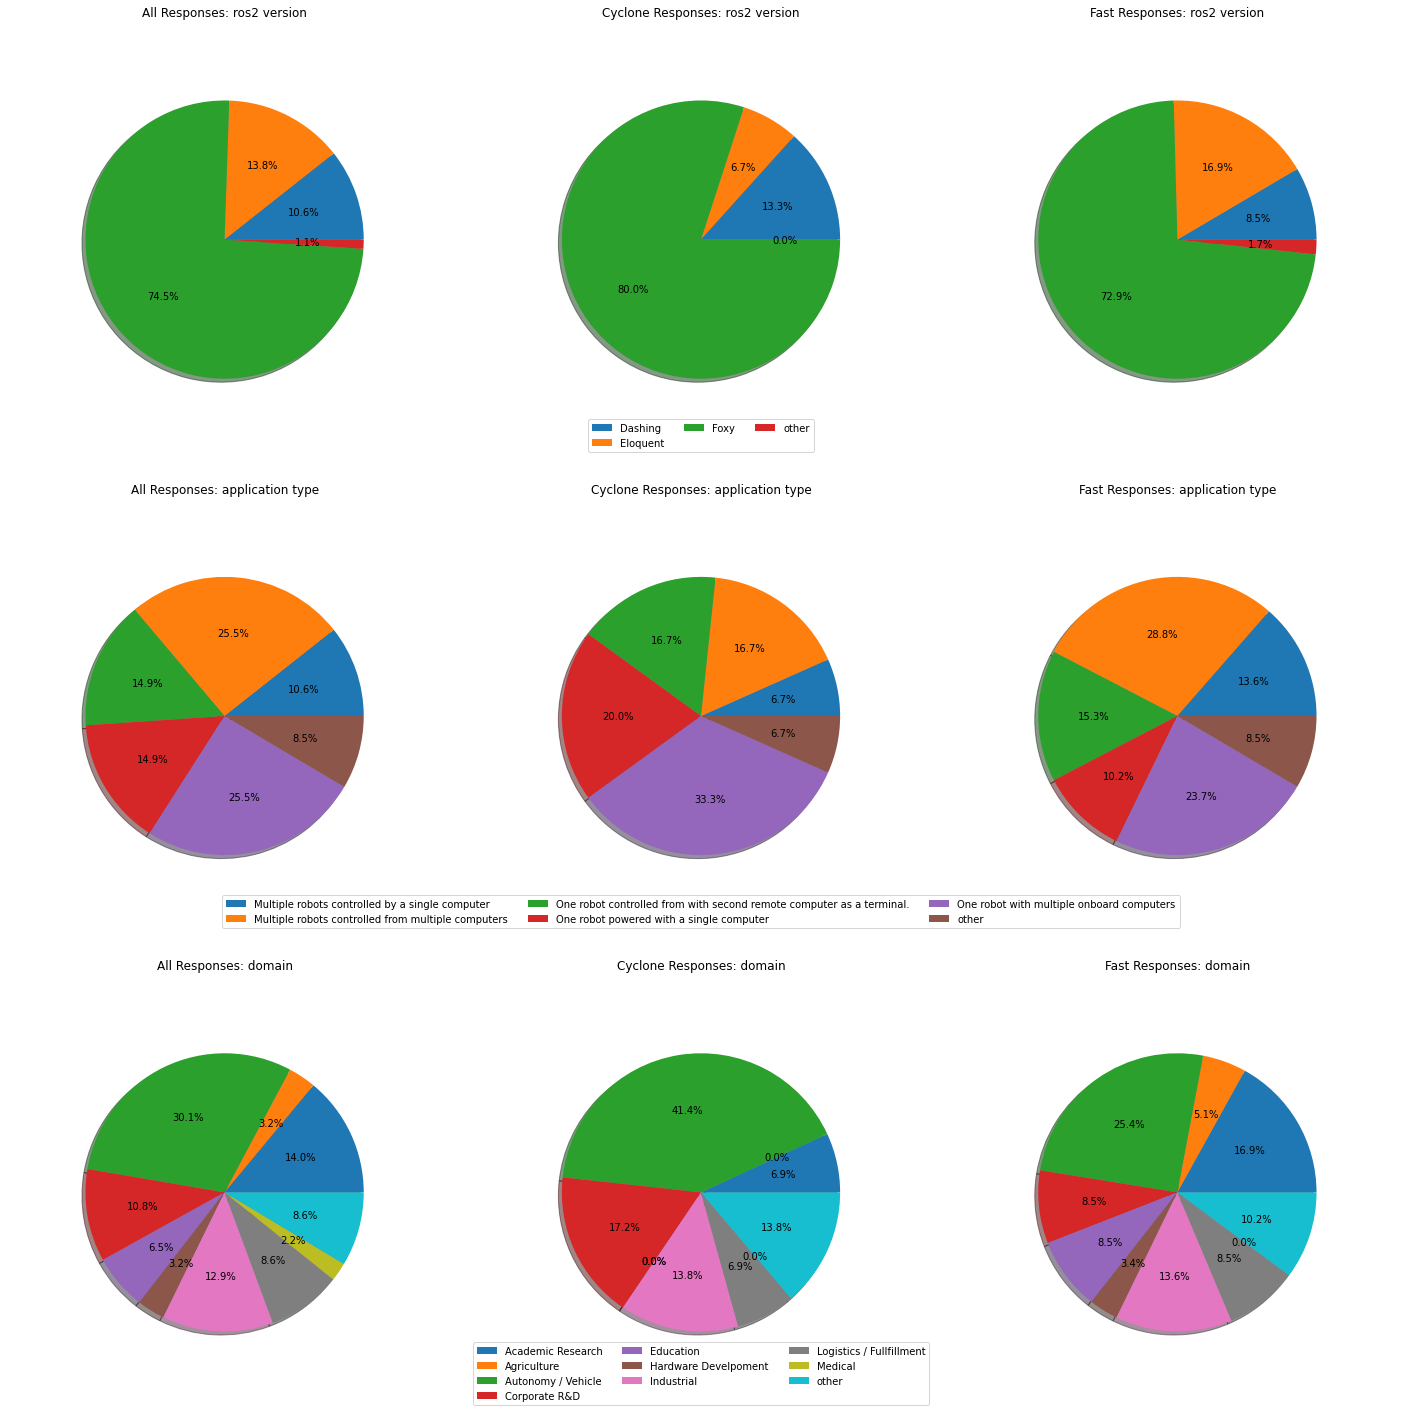

In [7]:
# Data set to use
dsets = [df,cyclone,fast]

# Names for plots
dset_names = ["All Responses","Cyclone Responses","Fast Responses"]

# What to plot
user_profile = ["ros2_version","application_type","domain"]

fig, ax = plt.subplots(len(user_profile),len(dsets),figsize=(20, 20))
fig.tight_layout()

for idx_x, param in enumerate(user_profile):
    for idx_y, dset in enumerate(dsets):
        counts = dset[param].value_counts(dropna=True,sort=True)
        # Anything with a single response goes in other bucket
        for index, value in counts.items():
            if value <= 1:
                dset.replace(index,"other",inplace=True)
        counts = dset[param].value_counts(dropna=True,sort=True)
        full_set = dsets[0][param].value_counts()
        # Hack to keep colors consistent
        for f in full_set.keys():
            if f not in counts.keys():
                counts = counts.append(pd.Series({f:0}))
        counts.sort_index(inplace=True)
        title = "{0}: {1}".format(dset_names[idx_y],param.replace("_"," "),)
        ax[idx_x,idx_y].set_title(title)
        patches,text,auto =ax[idx_x,idx_y].pie(counts.values,autopct='%1.1f%%', shadow=True,radius=0.8)
        if(idx_y == 1):
            ax[idx_x,idx_y].legend(patches, counts.keys(), loc="lower center",ncol=3)

plt.savefig("./plots/SurveyCohorts.png")
plt.show()

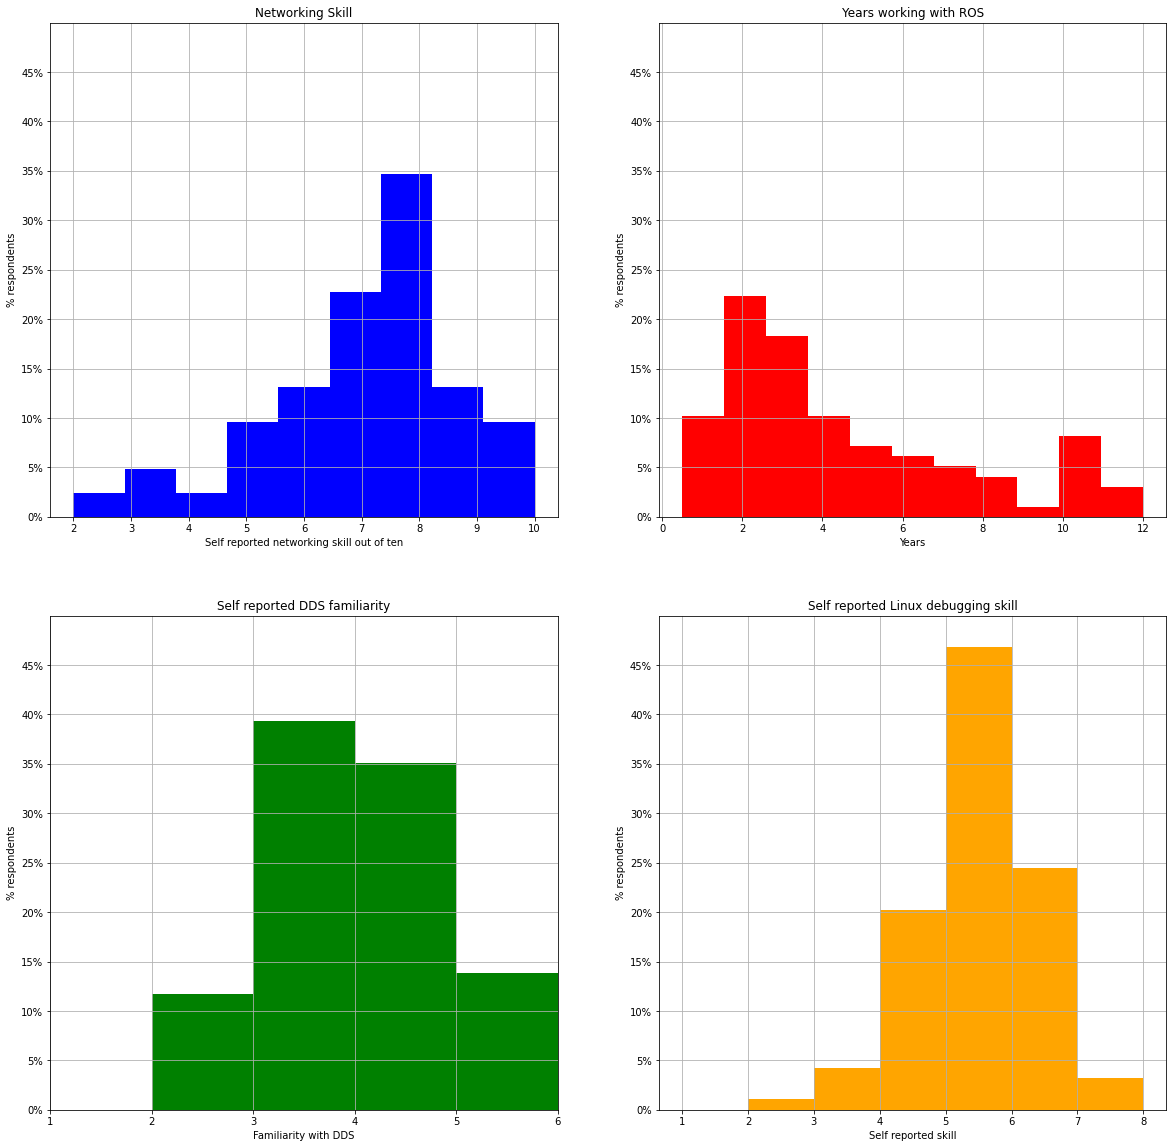

In [8]:
fig, ax = plt.subplots(2,2,figsize=(20, 20))
#"networking_skill","ros_years","familiarity",
#               "debugging","changed"
ax[0][0].hist(df["networking_skill"],density=True,bins=df["networking_skill"].max()-1, color="blue")
ax[0][0].grid()
ax[0][0].set_ylim(0,0.5)
ticks = np.arange(0,0.5,0.05)
tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
ax[0][0].set_yticks(ticks)
ax[0][0].set_yticklabels(tick_names)
ax[0][0].set_ylabel("% respondents")
ax[0][0].set_xlabel("Self reported networking skill out of ten")
ax[0][0].set_title("Networking Skill")

ax[0][1].hist(df["ros_years"],density=True,bins=int(df["ros_years"].max())-1, color="red")
ax[0][1].grid()
ax[0][1].set_ylim(0,0.5)
ticks = np.arange(0,0.5,0.05)
tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
ax[0][1].set_yticks(ticks)
ax[0][1].set_yticklabels(tick_names)
ax[0][1].set_ylabel("% respondents")
ax[0][1].set_xlabel("Years")
ax[0][1].set_title("Years working with ROS")

ax[1][0].hist(df["familiarity"],bins=[1,2,3,4,5,6], density=True, color="green")
ax[1][0].grid()
ax[1][0].set_xlim(1,6)
ax[1][0].set_ylabel("% respondents")
ax[1][0].set_xlabel("Familiarity with DDS")
ax[1][0].set_ylim(0,0.5)
ticks = np.arange(0,0.5,0.05)
tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
ax[1][0].set_yticks(ticks)
ax[1][0].set_yticklabels(tick_names)
ax[1][0].set_title("Self reported DDS familiarity")

ax[1][1].hist(df["debugging"],density=True,bins=[1,2,3,4,5,6,7,8], color="orange")
ax[1][1].grid()
ax[1][1].set_ylim(0,0.5)
ticks = np.arange(0,0.5,0.05)
tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
ax[1][1].set_yticks(ticks)
ax[1][1].set_yticklabels(tick_names)
ax[1][1].set_ylabel("% respondents")
ax[1][1].set_xlabel("Self reported skill")
ax[1][1].set_title("Self reported Linux debugging skill")

plt.savefig("./plots/SurveySkillReport.png")

In [9]:
print("Fast NPS: {0}".format(fast["NPS"].apply(agree_score).mean()))
print("Cyclone NPS: {0}".format(cyclone["NPS"].apply(agree_score).mean()))

Fast NPS: 4.0
Cyclone NPS: 4.166666666666667


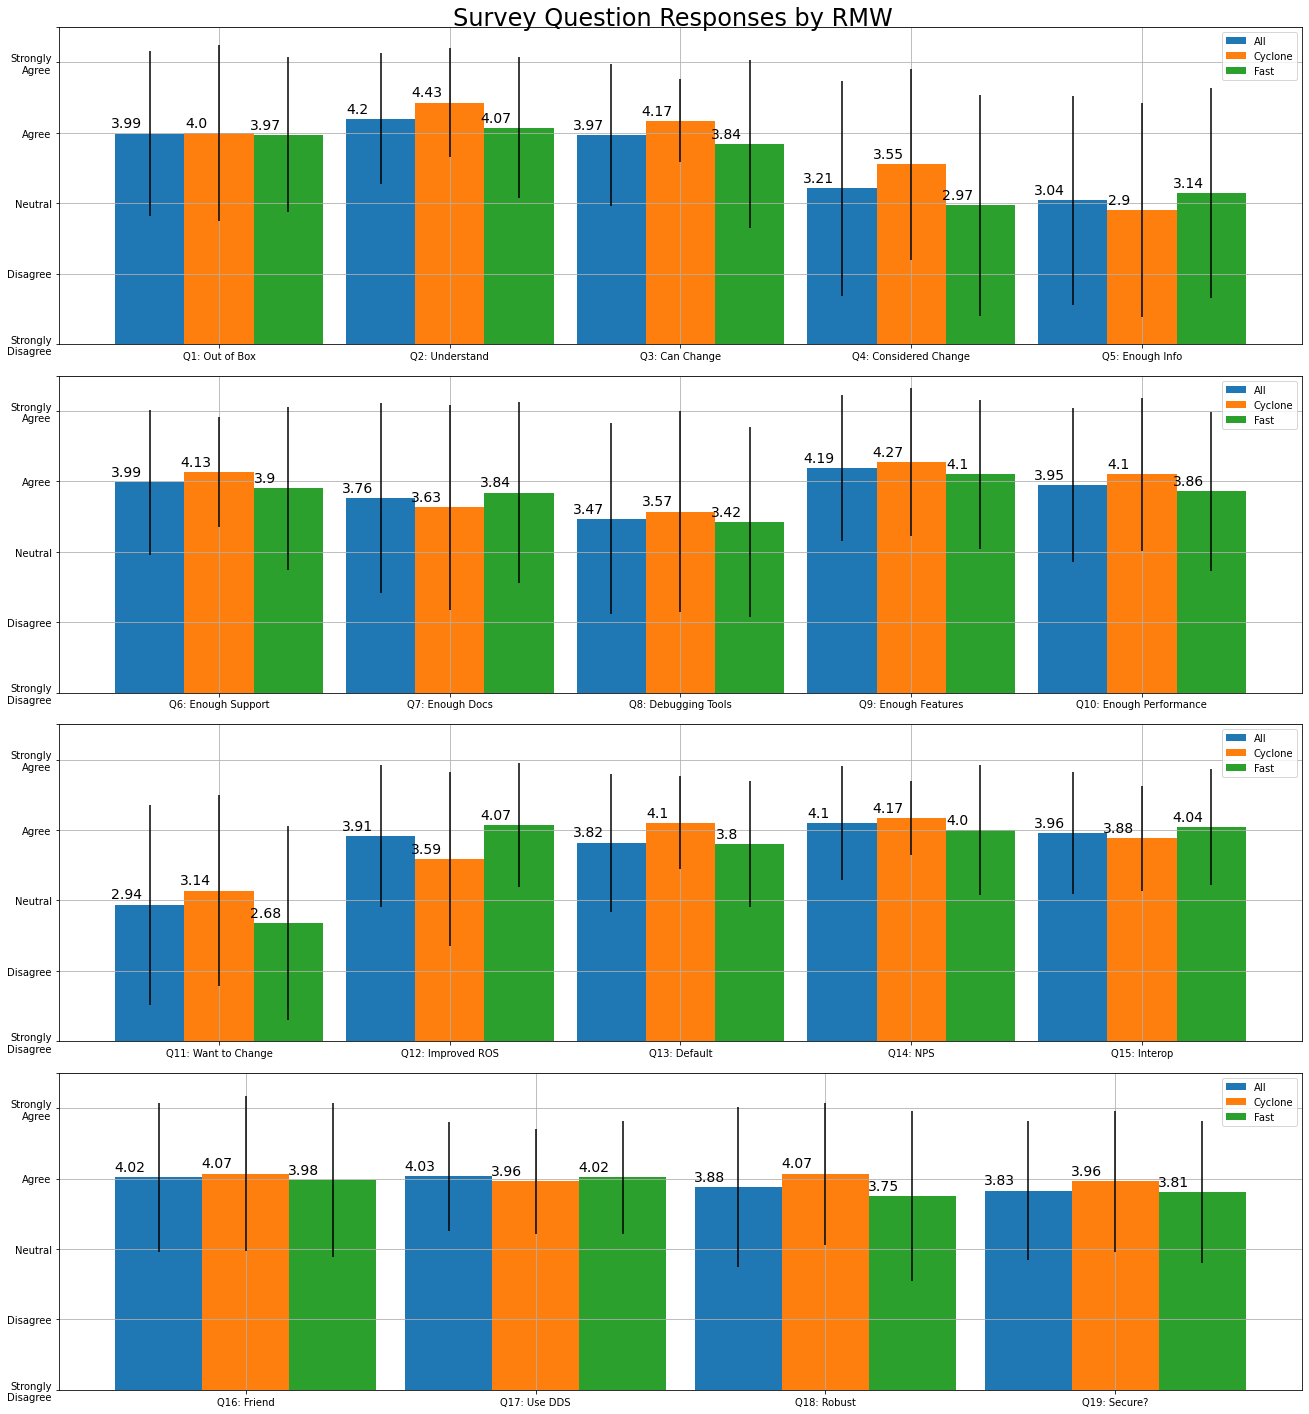

In [10]:
long_q = [p[120:].strip("]") for p in long_questions]
q_label = [
    "Q1: Out of Box",
    "Q2: Understand",
    "Q3: Can Change",
    "Q4: Considered Change",
    "Q5: Enough Info",
    "Q6: Enough Support",
    "Q7: Enough Docs",
    "Q8: Debugging Tools",
    "Q9: Enough Features",
    "Q10: Enough Performance",
    "Q11: Want to Change",
    "Q12: Improved ROS",
    "Q13: Default",
    "Q14: NPS",
    "Q15: Interop",
    "Q16: Friend",
    "Q17: Use DDS",
    "Q18: Robust",
    "Q19: Secure?"
]

# First convert and batch up the data 
rmw_names = ["All","Cyclone","Fast"]
set_means = []
set_std = []

# First assemble all of the set means and std data by group
for idx_x, param in enumerate(to_convert):
    batch = []
    batch_std = []
    for idx_y, dset in enumerate(dsets):
        batch.append(np.round(dset[param].apply(agree_score).dropna().mean(),2))
        batch_std.append(np.round(dset[param].apply(agree_score).dropna().std(),2))
    set_means.append(batch)
    set_std.append(batch_std)

fig, ax = plt.subplots(4,figsize=(18, 20))
# our batches of figures
plot_groups = [[0,5],[5,10],[10,15],[15,19]]
width = 0.3 # otherwise make them be a unit size
fig.suptitle("Survey Question Responses by RMW",fontsize=24)
fig.tight_layout()

for idx,group in enumerate(plot_groups): # for each row in the plot 
    tranche_set = []
    x = np.arange((group[1]-group[0])) # the label locations each bar gets three units, fast is split three ways
    for i in range(0,3): # the number of datasets, ie. fast, cyclone, combined
        tranche = [set_means[ds][i] for ds in range(group[0],group[1])]# build the batch from our data
        tranche_std = [set_std[ds][i] for ds in range(group[0],group[1])] # build the std from our data
        # plot the data. 
        rects = ax[idx].bar(x+(width*i),tranche,width,yerr=tranche_std,label=rmw_names[i]) # plot it 

        # Annotate the plots
        for rect in rects:
            height = rect.get_height()
            ax[idx].annotate('{}'.format(height),
                        xy=((rect.get_x()+0.05), height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            fontsize =14,
                            ha='center', va='bottom',rotation=0)
    # Plotting config
    ax[idx].grid()
    ax[idx].legend()
    ax[idx].set_ylim([1,5])
    ax[idx].set_xticks(x+0.3)
    ax[idx].set_xticklabels(q_label[group[0]:group[1]],rotation=0)
    ax[idx].set_yticks([1,2,3,4,5,5.5])
    ax[idx].set_yticklabels(["Strongly\nDisagree","Disagree","Neutral","Agree","Strongly\nAgree",""])
plt.savefig("./plots/SurveyResponses.png",pad_inches=1,bbox_inches="tight")

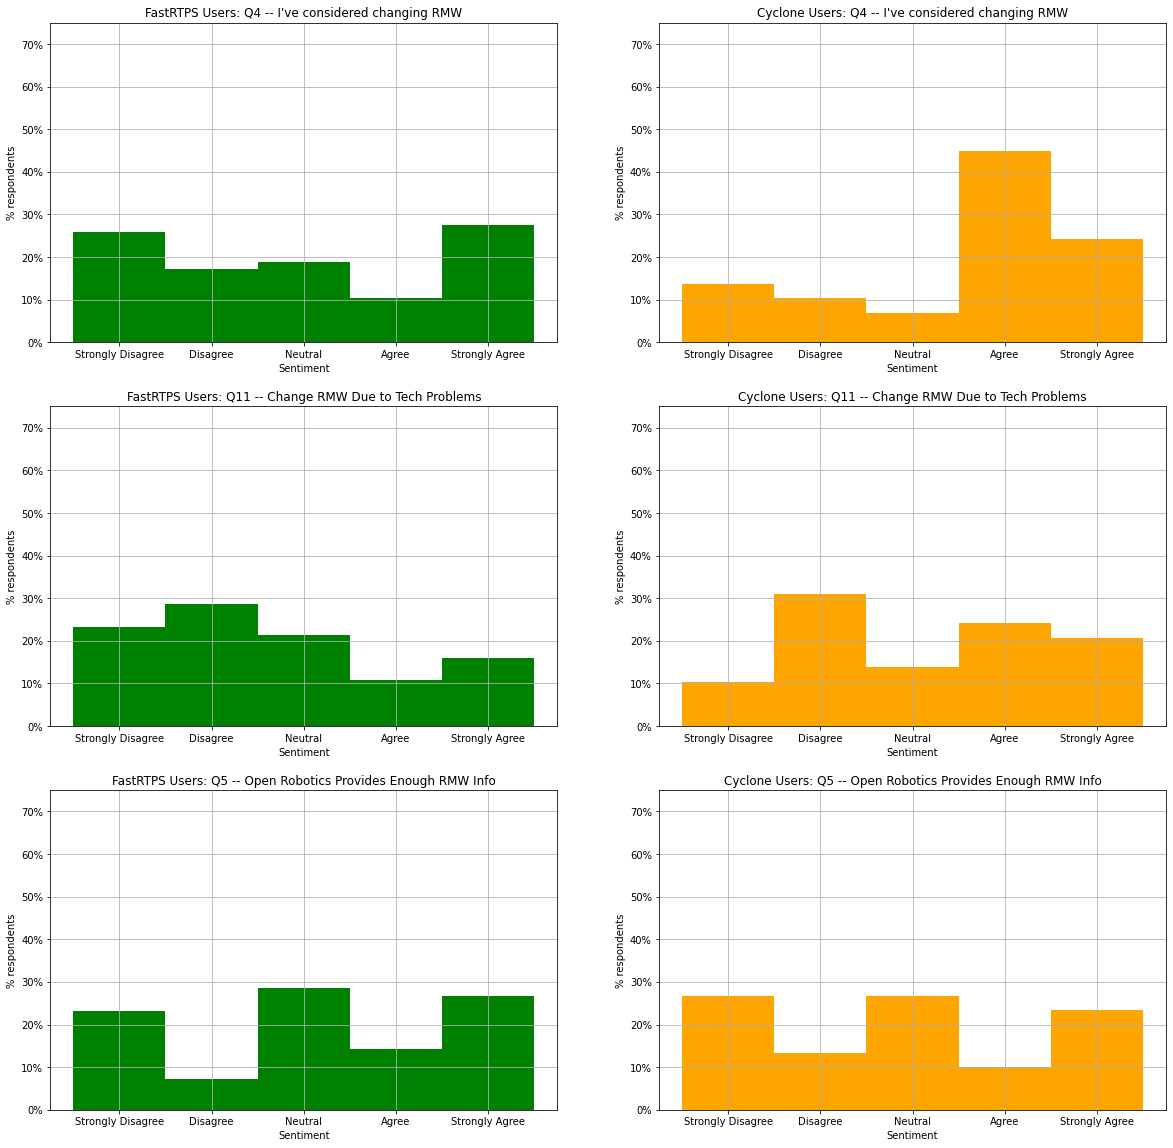

In [15]:
fig, ax = plt.subplots(3,2,figsize=(20, 20))

def plot_q_hist(ax,data,title,color):
    ax.hist(data,density=True,bins=[1,2,3,4,5,6],color=color)
    ax.grid()
    x = np.array([1,2,3,4,5])
    ax.set_xticks(x+0.5)
    yticks = [0,0.1,0.2,0.3,0.4,0]
    ax.set_yticks([])
    ax.set_ylim(0,0.75)
    ticks = np.arange(0,0.8,0.1)
    tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_names)
    ax.set_ylabel("% respondents")
    ax.set_xlabel("Sentiment")
    ax.set_xticklabels(["Strongly Disagree","Disagree","Neutral","Agree","Strongly Agree"])
    ax.set_title(title)

plot_q_hist(ax[0][0],fast["change_considered"].apply(agree_score).dropna(),"FastRTPS Users: Q4 -- I've considered changing RMW",color="green")
plot_q_hist(ax[0][1],cyclone["change_considered"].apply(agree_score).dropna(),"Cyclone Users: Q4 -- I've considered changing RMW",color="orange")
plot_q_hist(ax[1][0],fast["considered_change"].apply(agree_score).dropna(),"FastRTPS Users: Q11 -- Change RMW Due to Tech Problems",color="green")
plot_q_hist(ax[1][1],cyclone["considered_change"].apply(agree_score).dropna(),"Cyclone Users: Q11 -- Change RMW Due to Tech Problems",color="orange")
plot_q_hist(ax[2][0],fast["selection"].apply(agree_score).dropna(),"FastRTPS Users: Q5 -- Open Robotics Provides Enough RMW Info",color="green")
plot_q_hist(ax[2][1],cyclone["selection"].apply(agree_score).dropna(),"Cyclone Users: Q5 -- Open Robotics Provides Enough RMW Info",color="orange")
plt.savefig("./plots/SurveyDrillDown1.png")

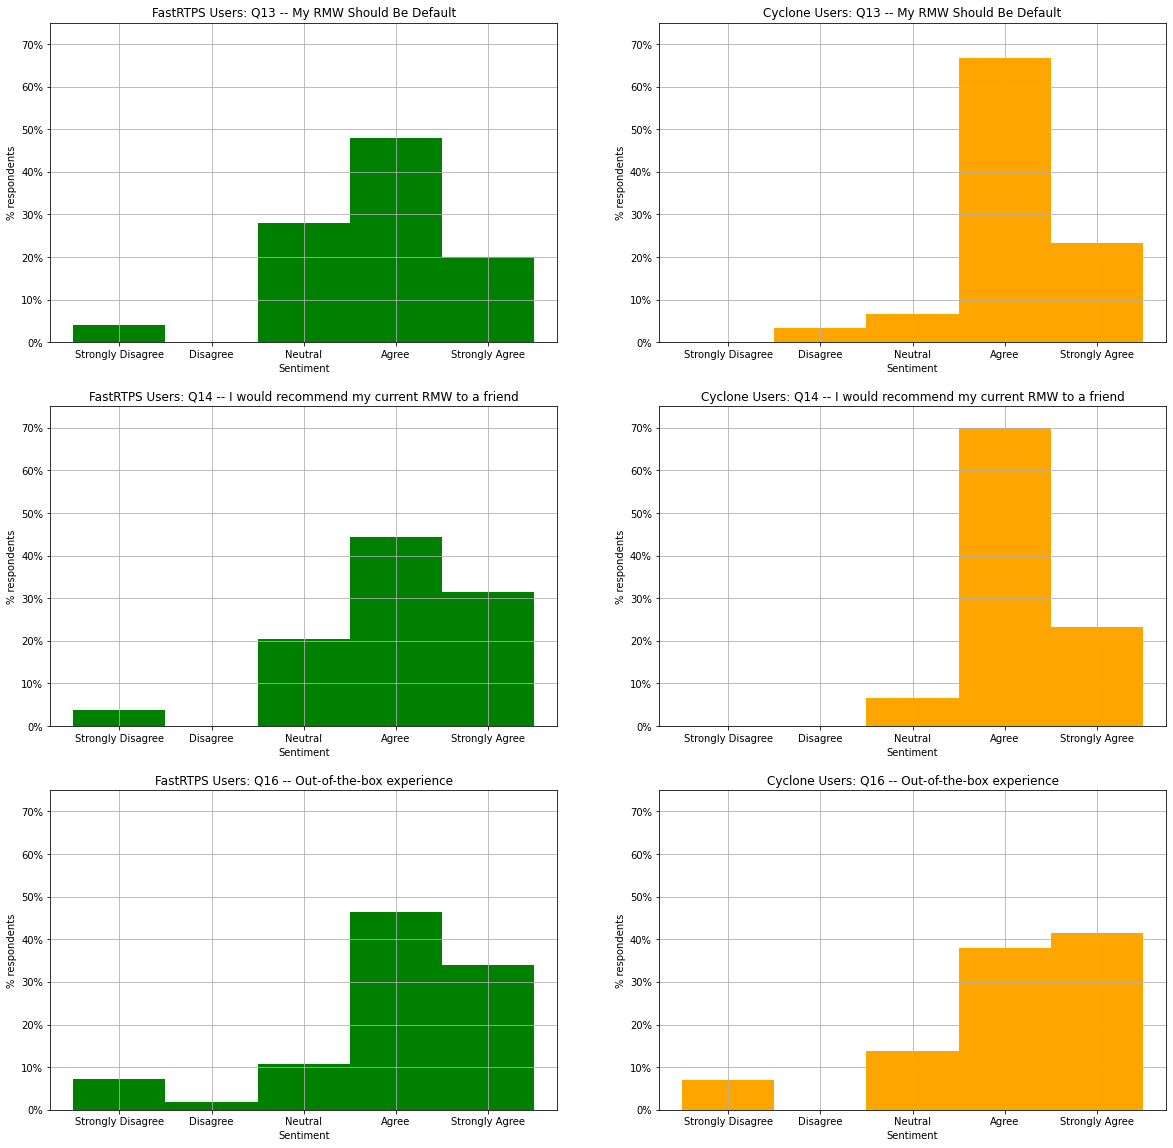

In [16]:
fig, ax = plt.subplots(3,2,figsize=(20, 20))
plot_q_hist(ax[0][0],fast["advocate_default"].apply(agree_score).dropna(),"FastRTPS Users: Q13 -- My RMW Should Be Default",color="green")
plot_q_hist(ax[0][1],cyclone["advocate_default"].apply(agree_score).dropna(),"Cyclone Users: Q13 -- My RMW Should Be Default",color="orange")
plot_q_hist(ax[1][0],fast["NPS"].apply(agree_score).dropna(),"FastRTPS Users: Q14 -- I would recommend my current RMW to a friend",color="green")
plot_q_hist(ax[1][1],cyclone["NPS"].apply(agree_score).dropna(),"Cyclone Users: Q14 -- I would recommend my current RMW to a friend",color="orange")
plot_q_hist(ax[2][0],fast["ros2_nps"].apply(agree_score).dropna(),"FastRTPS Users: Q16 -- Out-of-the-box experience",color="green")
plot_q_hist(ax[2][1],cyclone["ros2_nps"].apply(agree_score).dropna(),"Cyclone Users: Q16 -- Out-of-the-box experience",color="orange")
plt.savefig("./plots/SurveyDrillDown2.png")

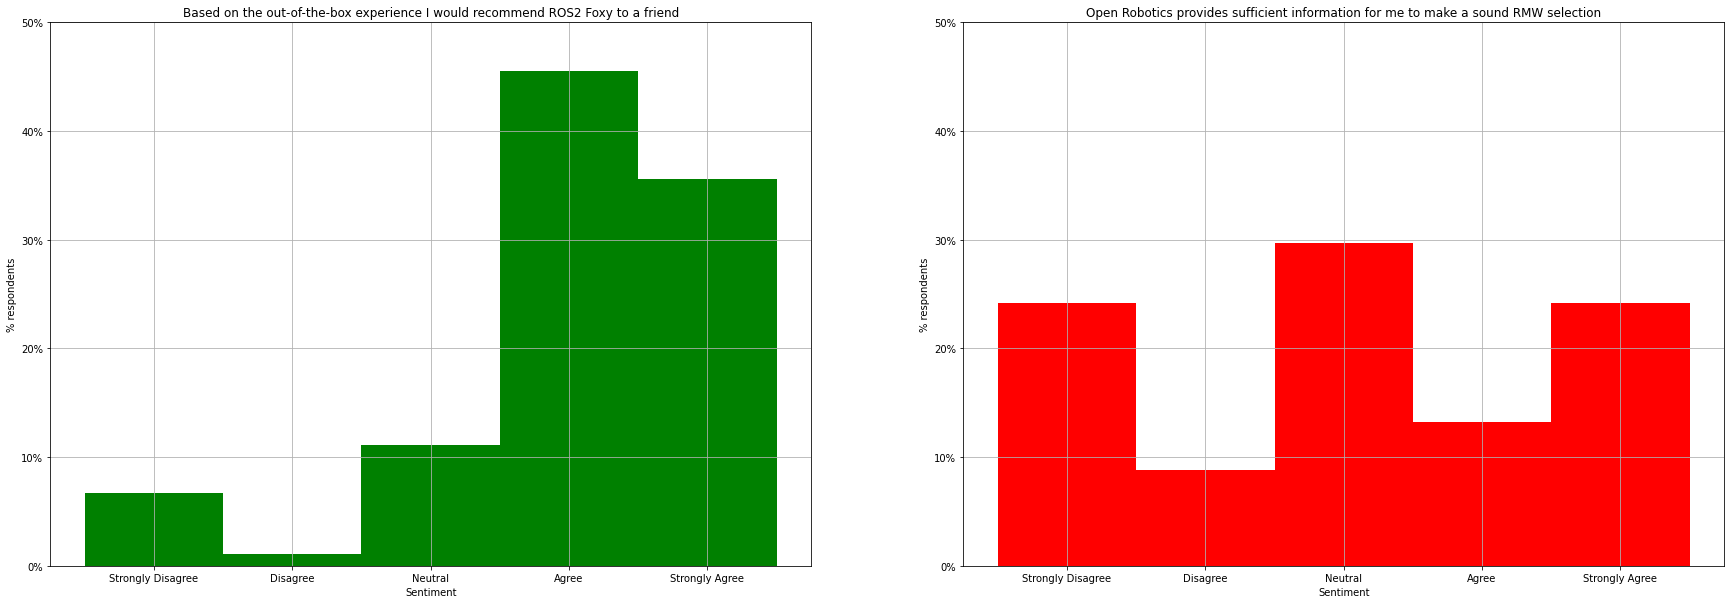

In [53]:
fig, ax = plt.subplots(1,2,figsize=(30, 10))

def plot_q_hist(ax,data,title,color):
    ax.hist(data,density=True,bins=[1,2,3,4,5,6],color=color)
    ax.grid()
    x = np.array([1,2,3,4,5])
    ax.set_xticks(x+0.5)
#    yticks = [0,0.1,0.2,0.3,0.4,0.45,0.5,0.55]
#    ax.set_yticks(yticks)
#    ax.set_ylim(0,0.55)
    ticks = np.arange(0,0.55,0.1)
    tick_names = ["{0:.0f}%".format(100*t) for t in ticks]
    ax.set_yticks(ticks)
    ax.set_yticklabels(tick_names)
    ax.set_ylabel("% respondents")
    ax.set_xlabel("Sentiment")
    ax.set_xticklabels(["Strongly Disagree","Disagree","Neutral","Agree","Strongly Agree"])
    ax.set_title(title)
    
    
"better_for_ros","advocate_default","NPS","interop"    
#plot_q_hist(ax[0][0],df["support"].apply(agree_score).dropna(),"FastRTPS Users: Q13 -- My RMW Should Be Default",color="red")
#plot_q_hist(ax[0],df["use_dds"].apply(agree_score).dropna()," DDS/RMWs have improved the overall ROS experience",color="orange")
#plot_q_hist(ax[1],df["interop"].apply(agree_score).dropna(),"My RMW interoperates well with other systems",color="blue")

plot_q_hist(ax[0],df["ros2_nps"].apply(agree_score).dropna(),"Based on the out-of-the-box experience I would recommend ROS2 Foxy to a friend",color="green")
plot_q_hist(ax[1],df["selection"].apply(agree_score).dropna(),"Open Robotics provides sufficient information for me to make a sound RMW selection",color="red")